In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

In [ ]:
df = pd.read_csv("/content/Mall_Customers.csv")
# df = df.drop(['CustomerID',"Gender","Spending Score (1-100)"],axis=1)
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [ ]:
df.duplicated().sum()

0

<Figure size 1600x1000 with 0 Axes>

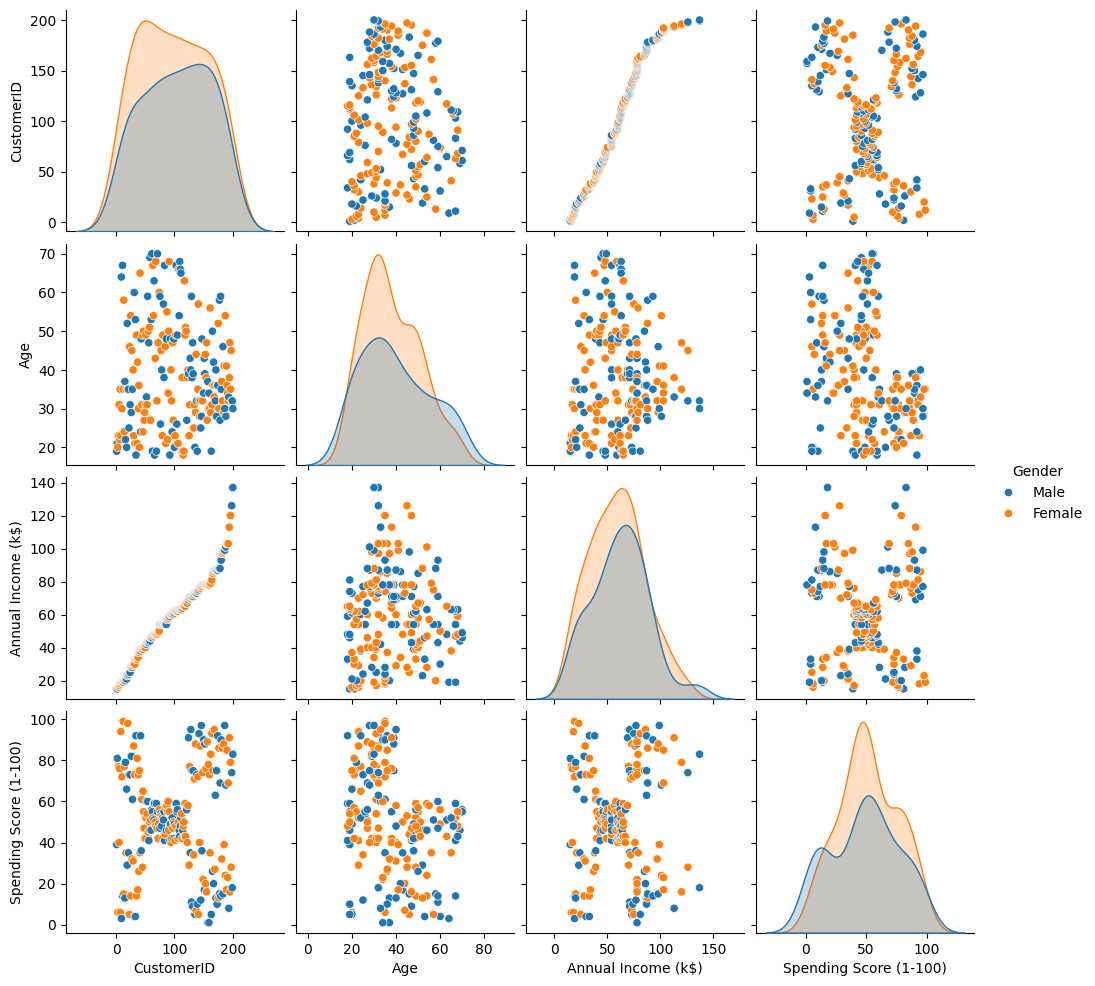

In [ ]:
import seaborn as sns

plt.figure(1,figsize=(16,10))
sns.pairplot(data=df, hue='Gender')
plt.show()

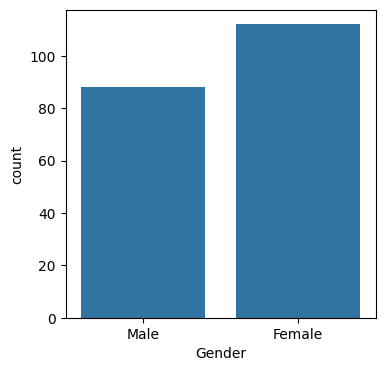

In [ ]:
plt.figure(1,figsize=(4,4))
sns.countplot(x='Gender',data=df)
plt.show()

<ipython-input-15-af03c0c24a85>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=10)
<ipython-input-15-af03c0c24a85>:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[x],bins=10)
<ipython-input-15-af03c0c24a85>:8: UserWarning: 

`distplot` is a deprecated function and will be remove

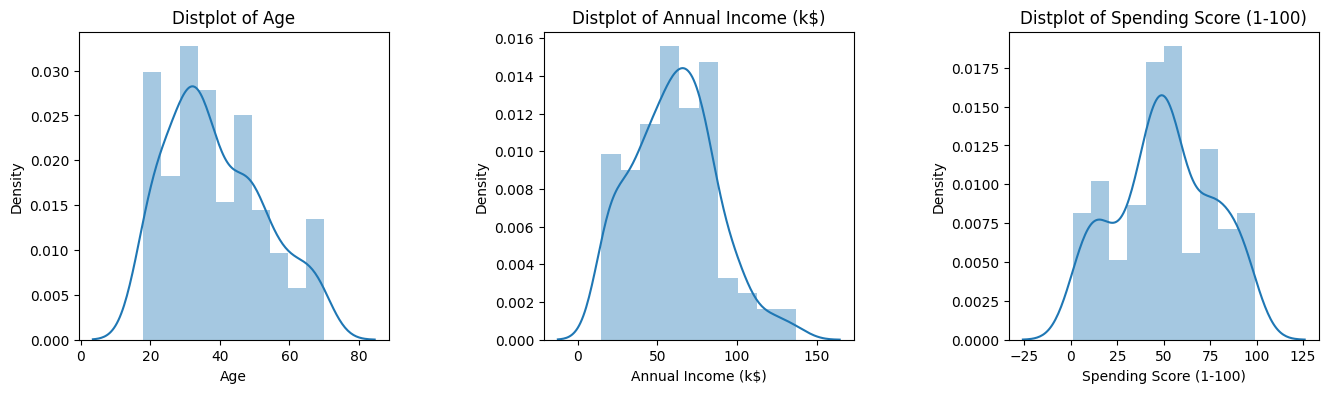

In [ ]:
plt.figure(1,figsize = (16,4))
n=0

for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
  n = n+1
  plt.subplot(1,3,n)
  plt.subplots_adjust(hspace=0.5,wspace=0.5)
  sns.distplot(df[x],bins=10)
  plt.title('Distplot of {}'.format(x))
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

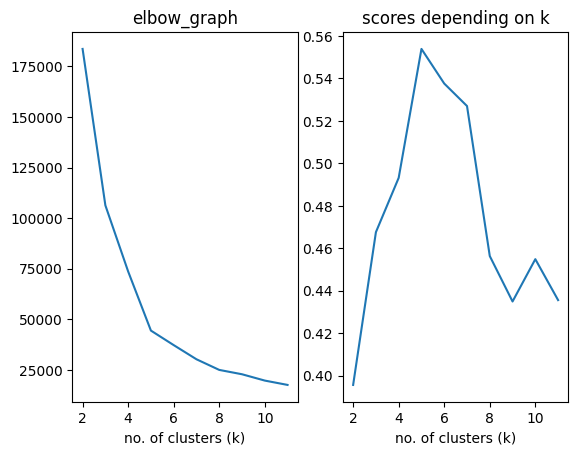

In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

X = df.iloc[:,3:5]  #'Annual Income (k$)','Spending Score (1-100)'
km_inertias = []
km_scores = []

for k in range(2,12):
  km = KMeans(n_clusters=k).fit(X)
  km_inertias.append(km.inertia_)
  km_scores.append(silhouette_score(X,km.labels_))

plt.subplot(1,2,1)
plt.figure(1, figsize=(10,10))
plt.plot(range(2,12),km_inertias)
plt.title('elbow_graph')
plt.xlabel('no. of clusters (k)')

plt.subplot(1,2,2)
plt.figure(1, figsize=(10,10))
plt.plot(range(2, 12), km_scores)
plt.title('scores depending on k')
plt.xlabel('no. of clusters (k)')

plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

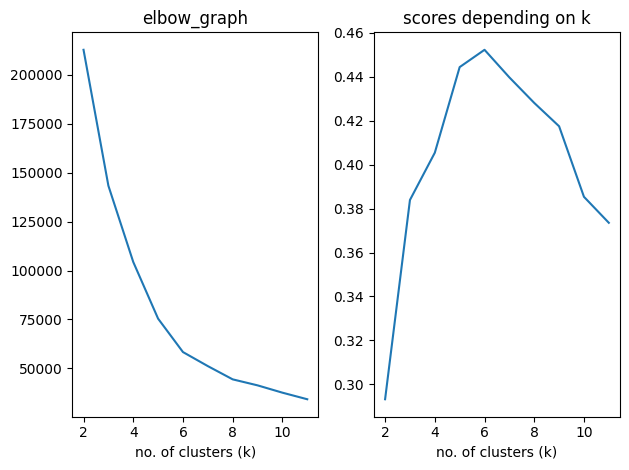

In [ ]:
X = df.iloc[:,-3:]      #'Age','Annual Income (k$)','Spending Score (1-100)'

km_inertias = []
km_scores = []

for k in range(2,12):
  km = KMeans(n_clusters=k).fit(X)
  km_inertias.append(km.inertia_)
  km_scores.append(silhouette_score(X,km.labels_))

plt.subplot(1,2,1)
plt.figure(1, figsize=(10,10))
plt.plot(range(2,12),km_inertias)
plt.title('elbow_graph')
plt.xlabel('no. of clusters (k)')

plt.subplot(1,2,2)
plt.figure(1, figsize=(10,10))
plt.plot(range(2, 12), km_scores)
plt.title('scores depending on k')
plt.xlabel('no. of clusters (k)')

plt.tight_layout()
plt.show()

In [ ]:
km = KMeans(n_clusters=5).fit(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


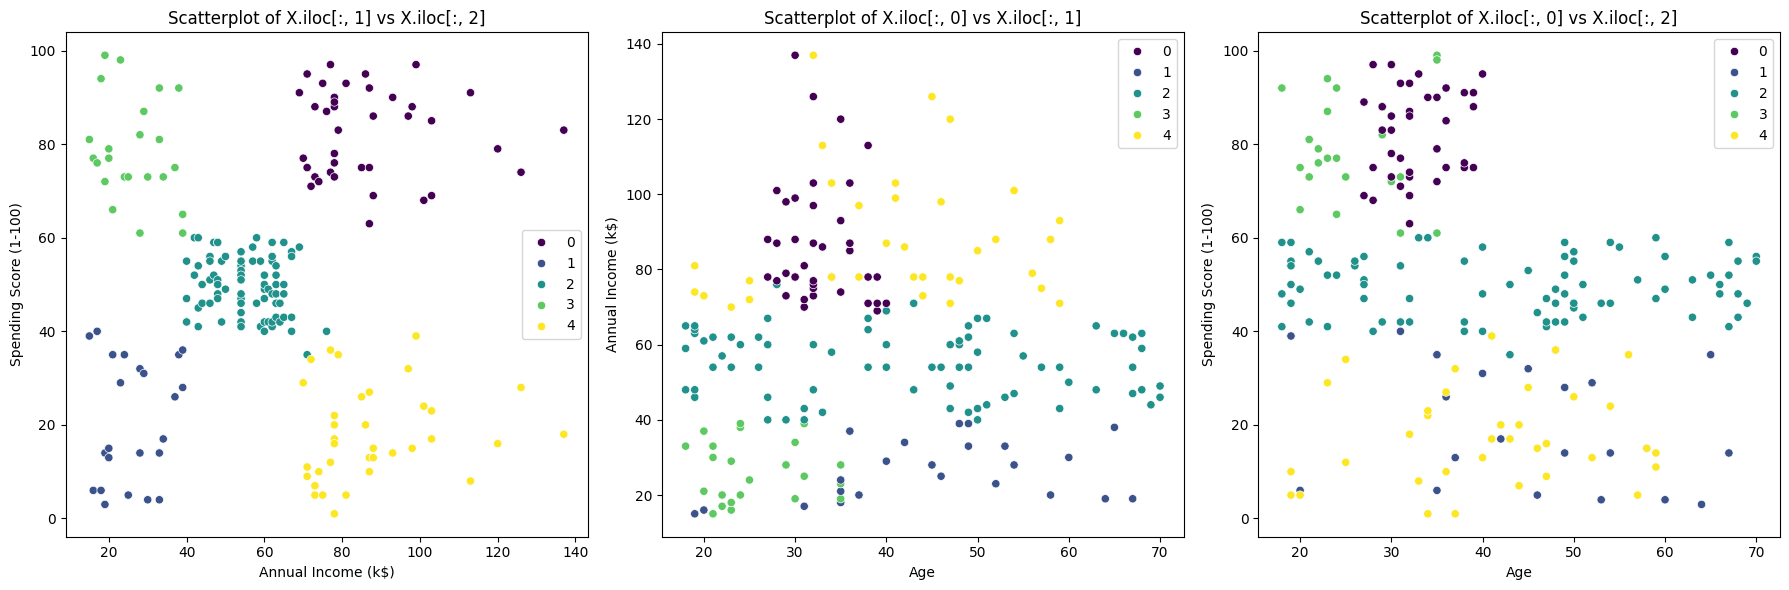

In [ ]:
plt.figure(figsize=(18, 6))

plt.subplot(1, 3, 1)
sns.scatterplot(x=X.iloc[:, 1], y=X.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.title('Scatterplot of X.iloc[:, 1] vs X.iloc[:, 2]')

plt.subplot(1, 3, 2)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 1], hue=km.labels_, palette='viridis')
plt.title('Scatterplot of X.iloc[:, 0] vs X.iloc[:, 1]')

plt.subplot(1, 3, 3)
sns.scatterplot(x=X.iloc[:, 0], y=X.iloc[:, 2], hue=km.labels_, palette='viridis')
plt.title('Scatterplot of X.iloc[:, 0] vs X.iloc[:, 2]')

plt.tight_layout()
plt.show()


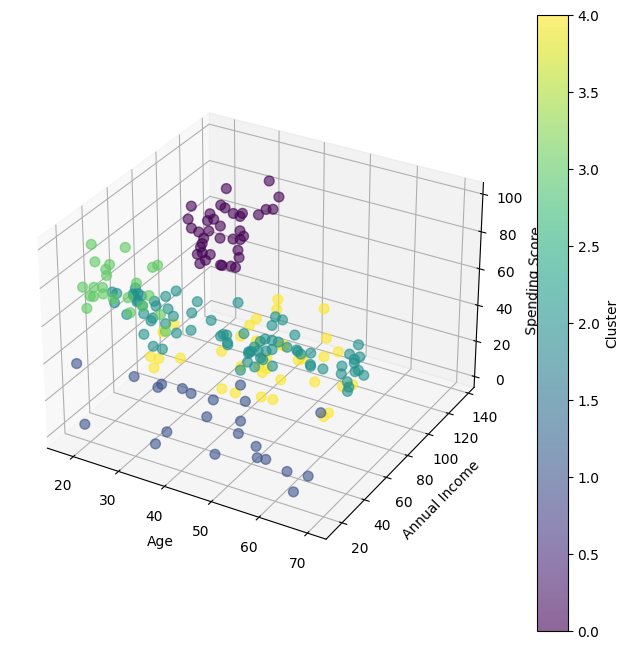

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(8, 8))
ax = fig.add_subplot(111, projection='3d')

xs = X.iloc[:, 0]
ys = X.iloc[:, 1]
zs = X.iloc[:, 2]

sc = ax.scatter(xs, ys, zs, s=50, alpha=0.6, c=km.labels_, cmap='viridis')

ax.set_xlabel('Age')
ax.set_ylabel('Annual Income')
ax.set_zlabel('Spending Score')

plt.colorbar(sc, ax=ax, label='Cluster')
plt.show()


In [ ]:
X['label'] = km.labels_
X.label.value_counts()


,count
label,
2,79
0,39
4,36
1,23
3,23


In [ ]:
for k in range(5):
    print(f'cluster nb : {k}')
    print(X[X.label == k].describe().iloc[[0, 1, 3, 7], :-1])
    print('\n\n')

cluster nb : 0
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
min    27.000000           69.000000               63.000000
max    40.000000          137.000000               97.000000



cluster nb : 1
             Age  Annual Income (k$)  Spending Score (1-100)
count  23.000000           23.000000               23.000000
mean   45.217391           26.304348               20.913043
min    19.000000           15.000000                3.000000
max    67.000000           39.000000               40.000000



cluster nb : 2
             Age  Annual Income (k$)  Spending Score (1-100)
count  79.000000           79.000000                79.00000
mean   43.088608           55.291139                49.56962
min    18.000000           40.000000                35.00000
max    70.000000           76.000000                60.00000



cluster nb : 3
             Age